# Unsupervised Learning with "Mall Customers" dataset using Clustering Algorithm

***Exploratory Data Analysis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\sonal\\Downloads\\archive\\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#Dropping CustomerID column
df = df.drop("CustomerID",axis=1)

In [9]:
#Lets check the Catagorical and Numerical column data in our dataset
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O'] #catagorical data
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']  #numarical data

In [10]:
df[cat_col].head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [11]:
df[num_col].head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Univariate Data Visualizations

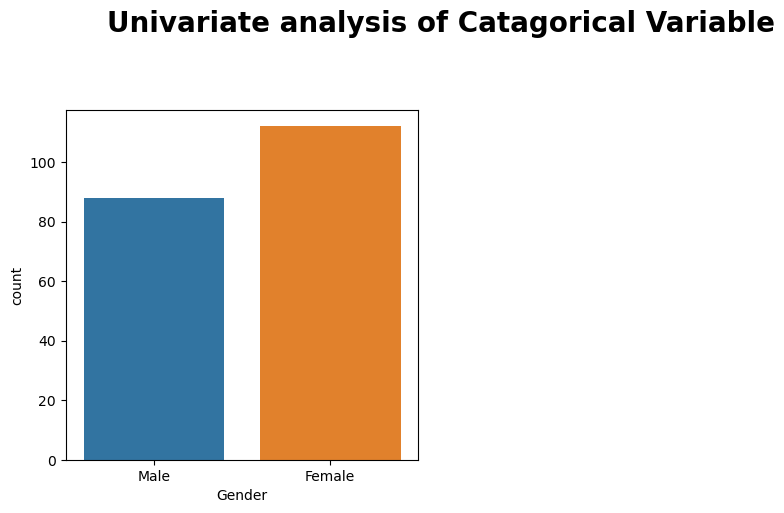

In [12]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate analysis of Catagorical Variable', fontsize=20, fontweight='bold')
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']

for i in range (0, len(cat_col)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[cat_col[i]])
    plt.xlabel(cat_col[i])


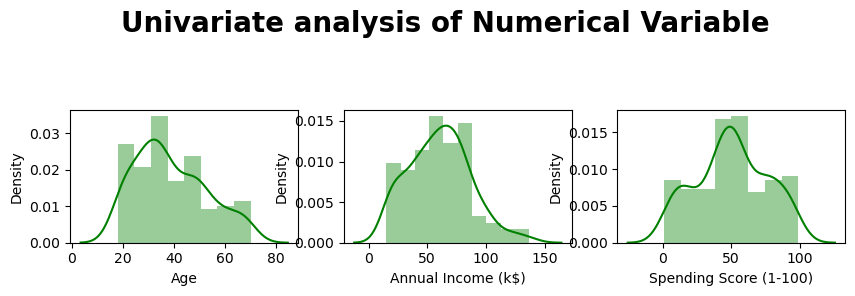

In [13]:
#Univariate Analysis on Numerical feature
plt.figure(figsize=(10,10))
plt.suptitle('Univariate analysis of Numerical Variable', fontsize=20, fontweight='bold')

for i in range (0, len(num_col)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[num_col[i]], color='g')
    plt.xlabel(num_col[i])

# Multivariate analysis

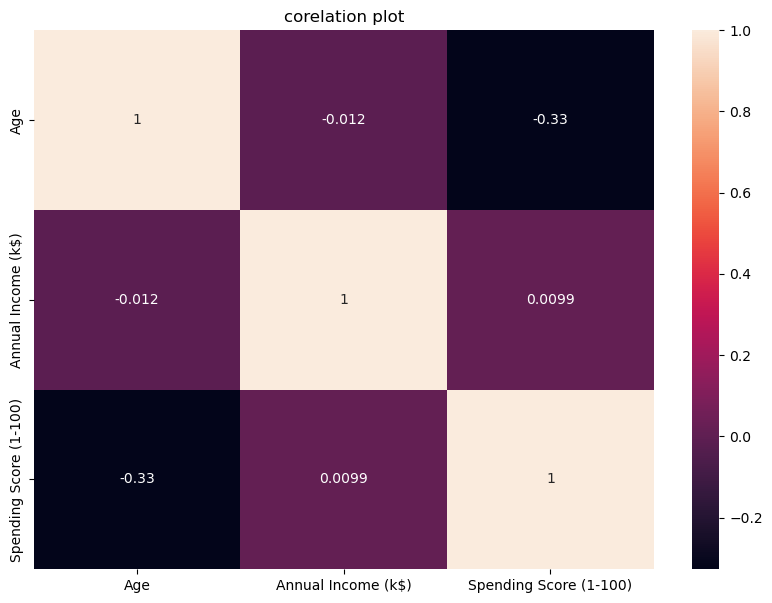

In [14]:
plt.figure(figsize=(10,7))
plt.title('corelation plot')
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

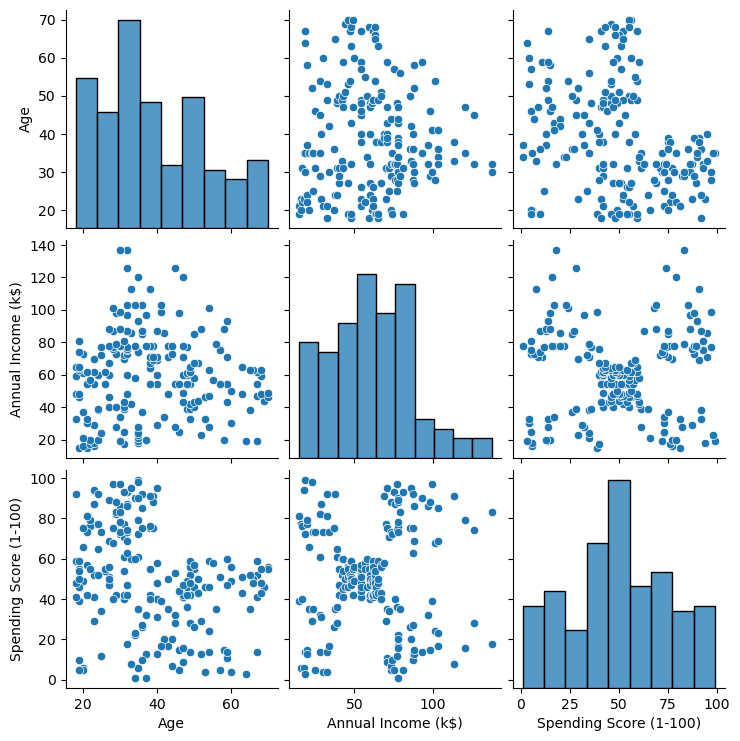

In [15]:
#Lets check the distributions of each feature
sns.pairplot(df)

# Lets check the distribution of Feature against Gender and Age

<AxesSubplot:title={'center':'Bar graph showing realtion between Gender and Age'}, xlabel='Age', ylabel='Count'>

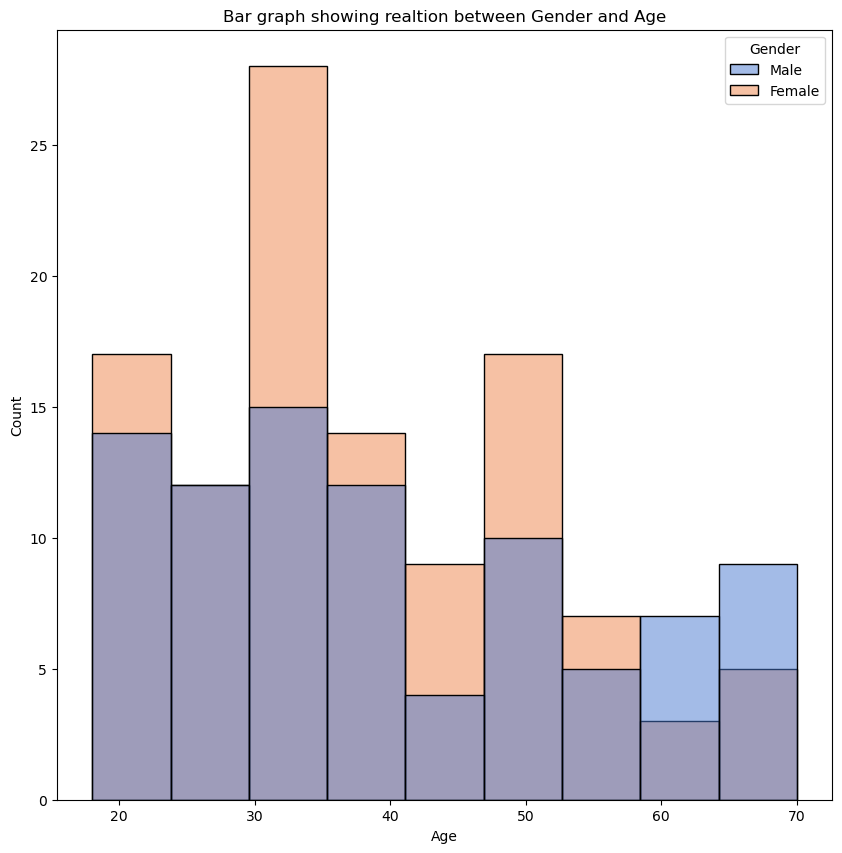

In [16]:
plt.figure(figsize=(10,10))
plt.title('Bar graph showing realtion between Gender and Age')
sns.histplot(data= df, hue = 'Gender', x= 'Age', palette = "muted")

Observation:  

* There are more number of Female than Male customers
             
* Customers age are ranging between 30-35

* Female customers are of age < 60

In [17]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:title={'center':'Bar graph showing realtion between Gender and Annual Income (k$)'}, xlabel='Annual Income (k$)', ylabel='Count'>

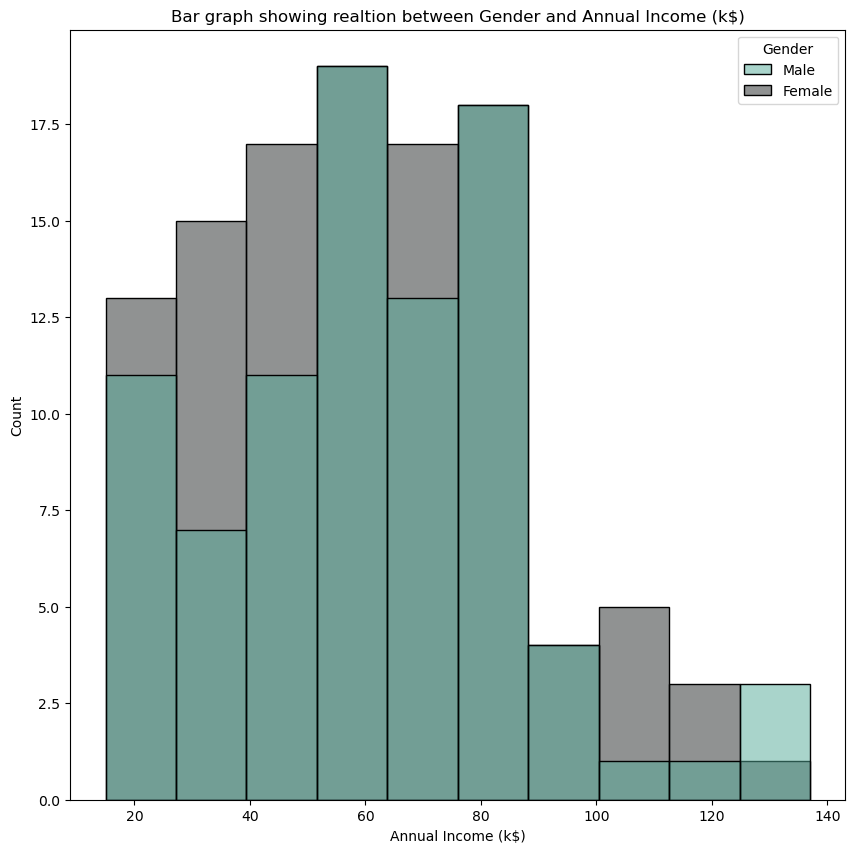

In [18]:
plt.figure(figsize=(10,10))
plt.title('Bar graph showing realtion between Gender and Annual Income (k$)')
sns.histplot(data= df, hue = 'Gender', x= 'Annual Income (k$)', palette = "dark:#5A9_r")

**Most of the customers have Annual income in the range of 40k$-75k$**

<AxesSubplot:title={'center':'Bar graph showing realtion between Gender and Spending Score (1-100)'}, xlabel='Spending Score (1-100)', ylabel='count'>

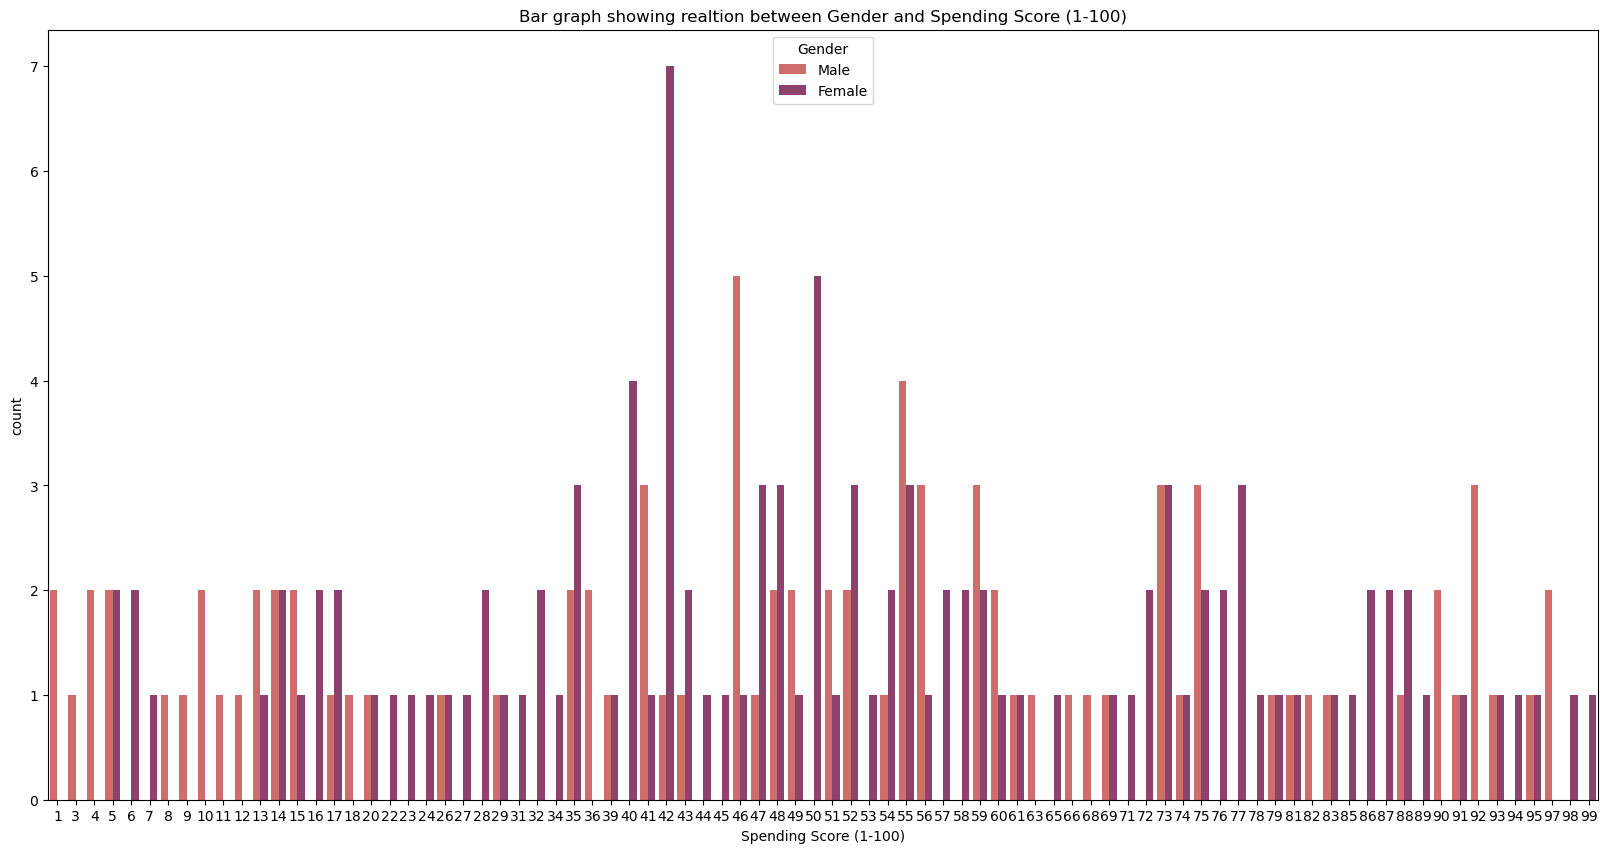

In [19]:
plt.figure(figsize=(20,10))
plt.title('Bar graph showing realtion between Gender and Spending Score (1-100)')
sns.countplot(data= df, hue = 'Gender', x= 'Spending Score (1-100)', palette = "flare")

**Observation:Speding score of Female is highest**

<AxesSubplot:title={'center':'Bar graph showing realtion between Age and Annual Income (k$)'}, xlabel='Age', ylabel='Annual Income (k$)'>

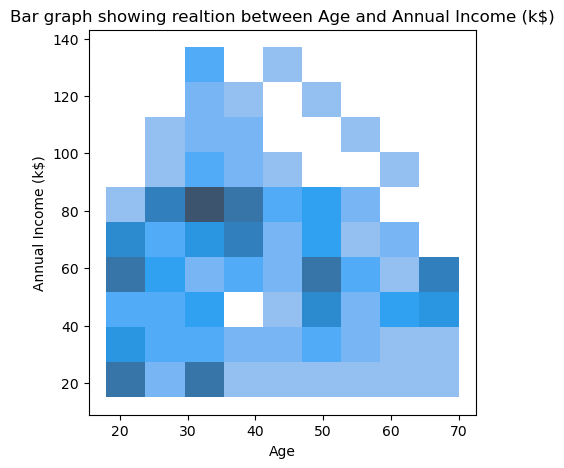

In [20]:
plt.figure(figsize=(5,5))
plt.title('Bar graph showing realtion between Age and Annual Income (k$)')
sns.histplot(data= df, x = "Age", y= "Annual Income (k$)", palette = "muted")

**The annual income of people aged between 30-50 are highest and is ranging upto 135k$**

<AxesSubplot:title={'center':'Bar graph showing realtion between Age and Spending Score (1-100)'}, xlabel='Age', ylabel='Count'>

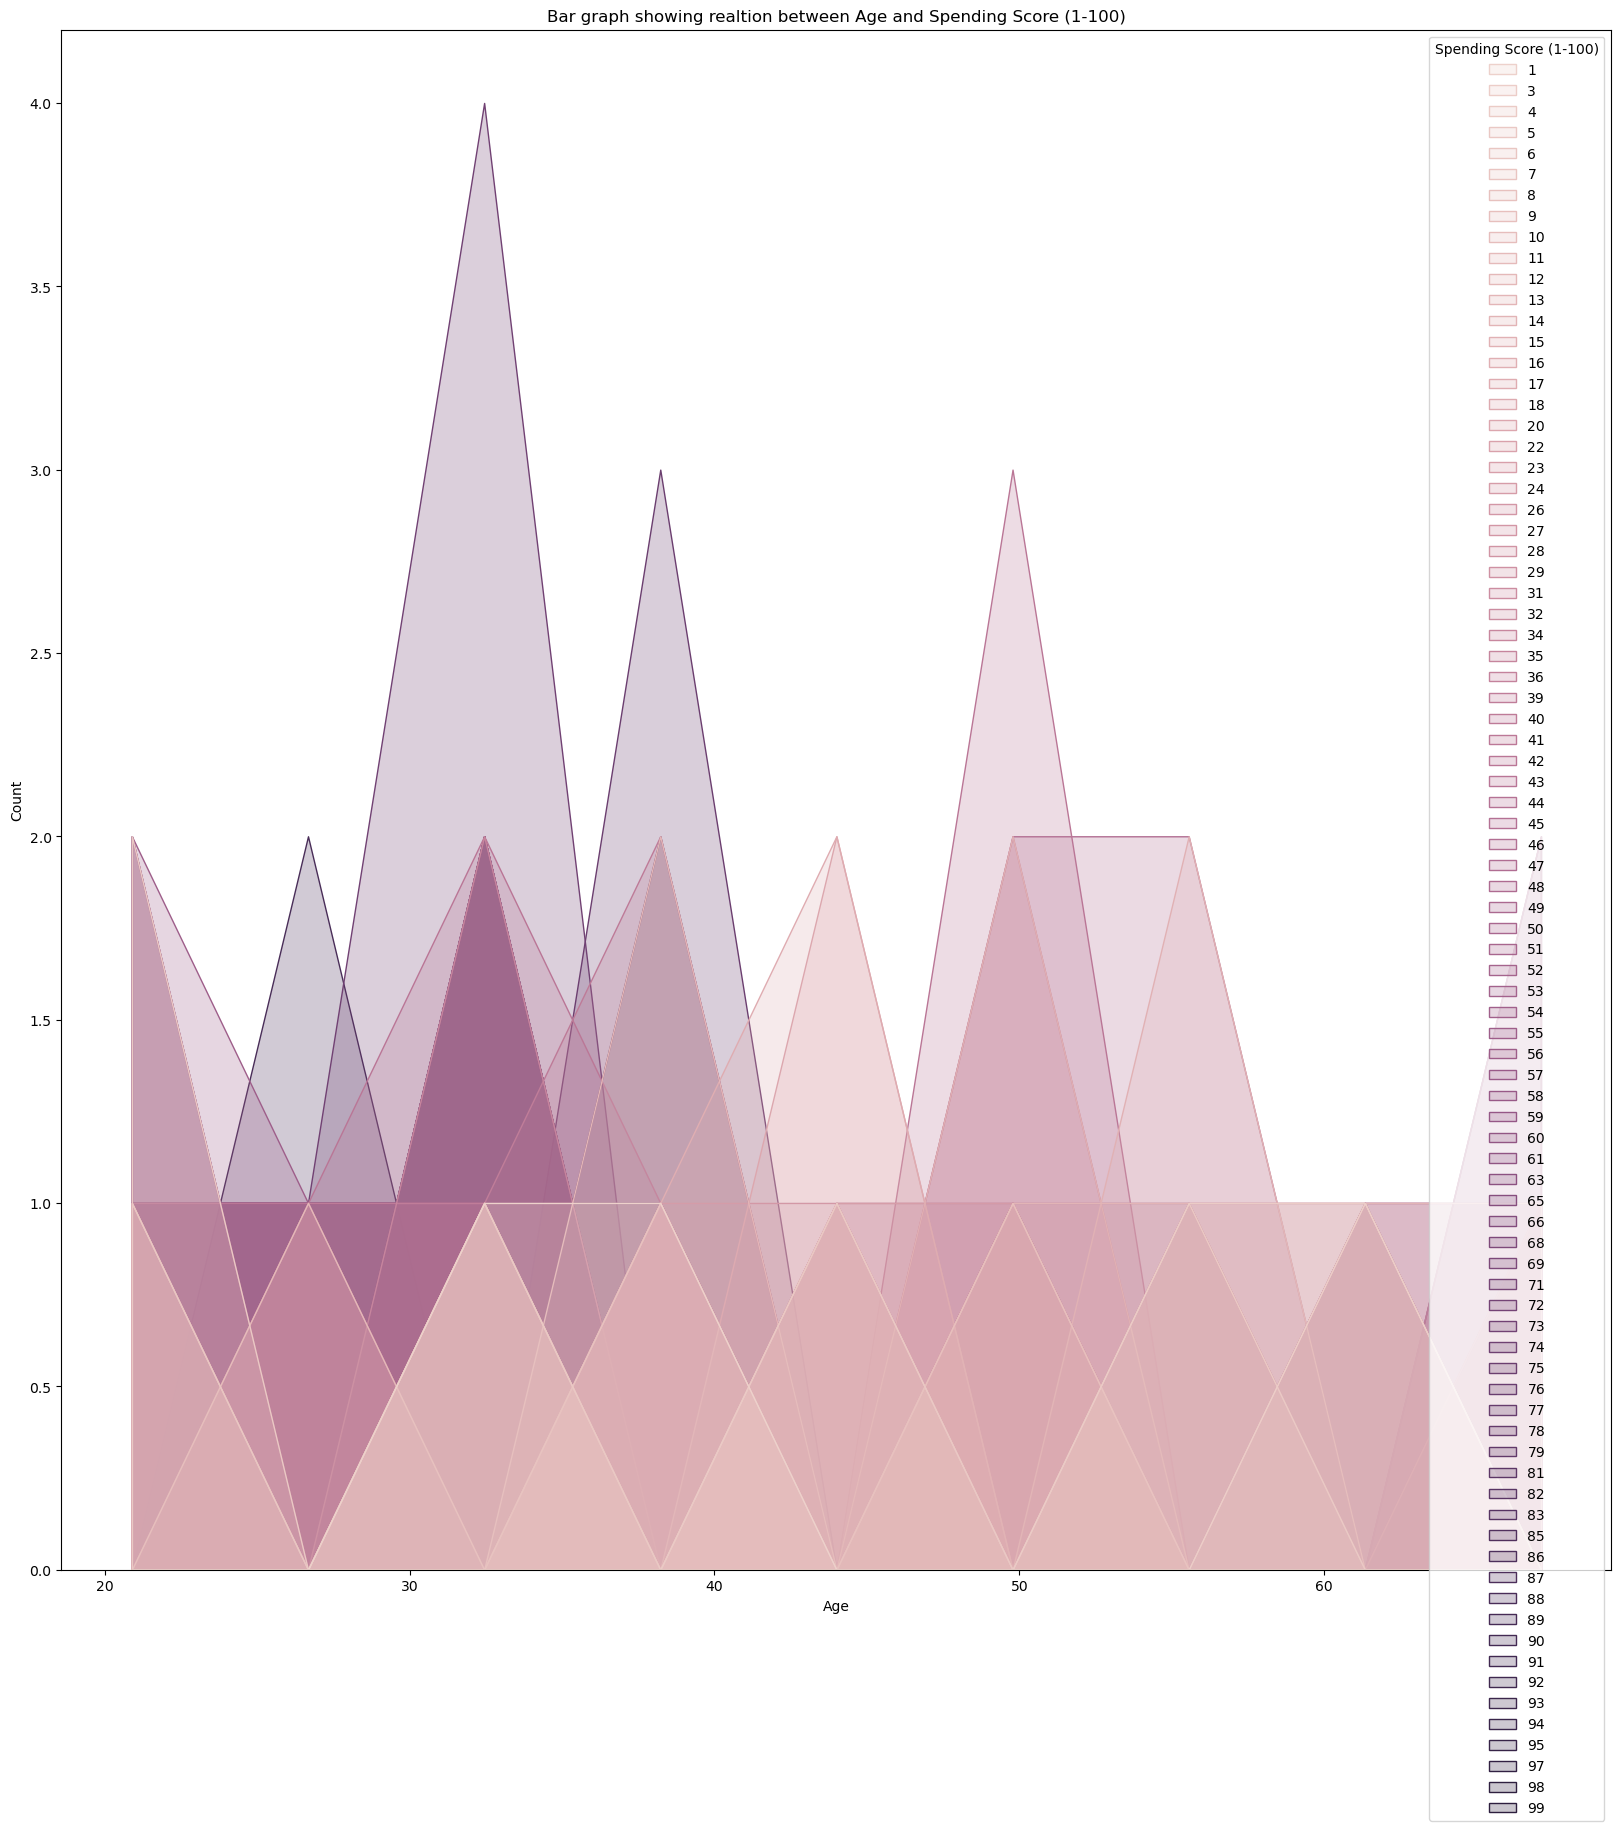

In [21]:
plt.figure(figsize=(20,20))
plt.title('Bar graph showing realtion between Age and Spending Score (1-100)')
sns.histplot(data= df, x = "Age", hue= "Spending Score (1-100)", element="poly")

# Outlier Detection

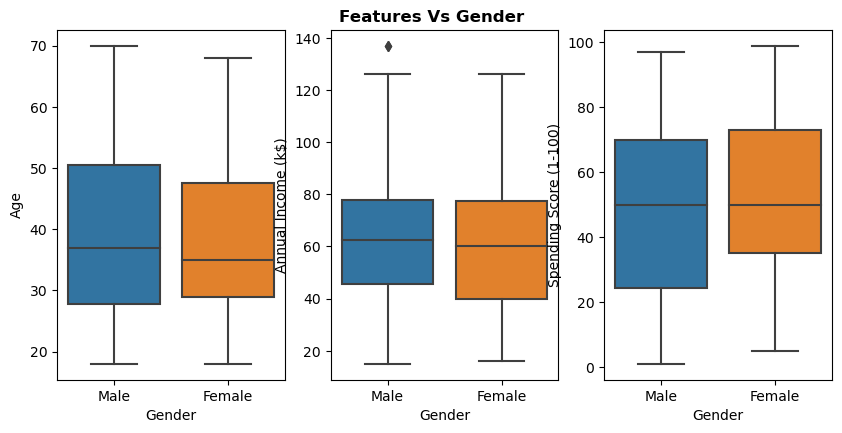

In [22]:
plt.figure(figsize=(10,10))
plt.suptitle("Features Vs Gender",fontweight='bold',y=0.9)
for i in range(0, len(num_col)):
    ax = plt.subplot(2, 3, i+1)
    sns.boxplot(data = df, x = 'Gender', y = df[num_col[i]])

**Outlier is in "Annual Income"**

<AxesSubplot:xlabel='Annual Income (k$)'>

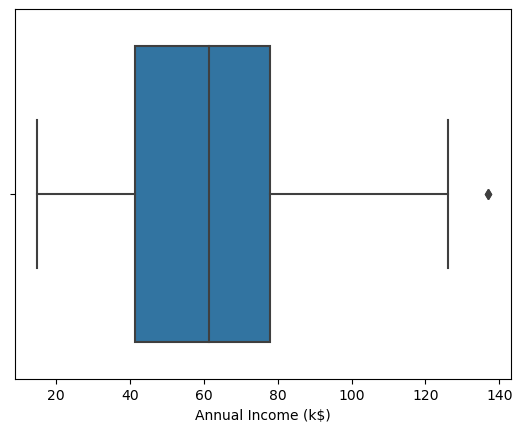

In [23]:
sns.boxplot(df['Annual Income (k$)'])

In [24]:
# Importing
import sklearn
''' Detection '''
# IQR
Q1 = np.percentile(df['Annual Income (k$)'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Annual Income (k$)'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Annual Income (k$)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Annual Income (k$)'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (200, 4)
New Shape:  (198, 4)


<AxesSubplot:xlabel='Annual Income (k$)'>

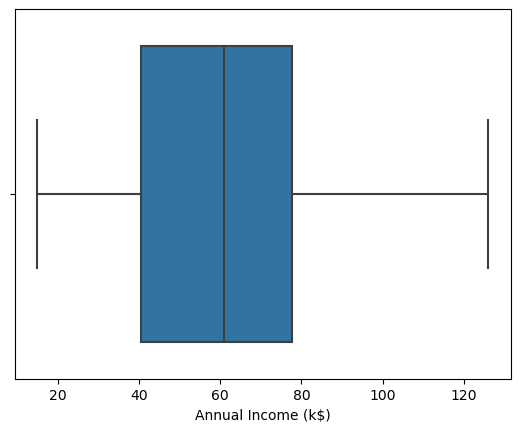

In [25]:
sns.boxplot(df['Annual Income (k$)'])

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Converting gender into 0's and 1's

In [27]:
# display categorical output
data_frame = pd.DataFrame(df, columns=["Gender"])
print(data_frame)

     Gender
0      Male
1      Male
2    Female
3    Female
4    Female
..      ...
193  Female
194  Female
195  Female
196  Female
197    Male

[198 rows x 1 columns]


In [28]:
# converting to binary data
df_one = pd.get_dummies(data_frame, columns=["Gender"])


In [29]:
df_one.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [30]:
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, data_frame), axis=1)
df_two.head()

,Gender_Female,Gender_Male,Gender
0,0,1,Male
1,0,1,Male
2,1,0,Female
3,1,0,Female
4,1,0,Female


In [31]:
# Gendercolumn is dropped
df_two = df_two.drop(["Gender"], axis=1)
 
# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["Gender_Male"], axis=1)

In [32]:
df = pd.concat((df_two, df), axis=1)
df

,Gender_Female,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,Male,19,15,39
1,0,Male,21,15,81
2,1,Female,20,16,6
3,1,Female,23,16,77
4,1,Female,31,17,40
...,...,...,...,...,...
193,1,Female,38,113,91
194,1,Female,47,120,16
195,1,Female,35,120,79
196,1,Female,45,126,28


**Male=0 and Female=1**

In [33]:
df = df.drop("Gender",axis=1)

In [34]:
df = df.rename(columns={"Gender_Female": "Gender"})
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
193       1   38                 113                      91
194       1   47                 120                      16
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74

[198 rows x 4 columns]


***Lets build our model***

In [35]:
clustering_data = df.iloc[:,[2,3]]
clustering_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# K-Means Implementation

In [36]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 42)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)


Text(0, 0.5, 'WCSS')

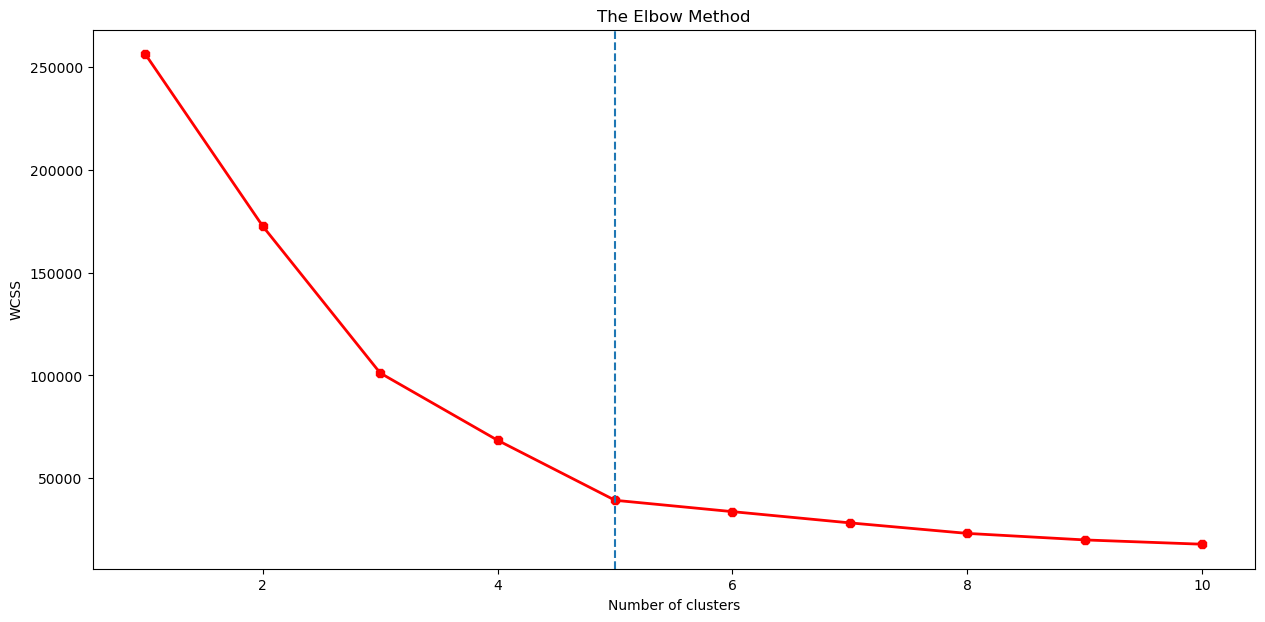

In [59]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5.

# Clustering

We will use n_clusters = 5 i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for unsupervised learning therefore we will use fit_predict() Suppose we were working with supervised learning data set we would use fit_tranform()

In [38]:
model = KMeans(n_clusters=5, init='k-means++')
model.fit(clustering_data)

KMeans(n_clusters=5)

Now that we have the clusters created, we will enter them into a different column

In [39]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = model.fit_predict(clustering_data)
clusters.head()

,Annual Income (k$),Spending Score (1-100),Cluster_Prediction
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.

In [40]:
model.cluster_centers_

array([[55.0875    , 49.7125    ],
       [85.21052632, 82.10526316],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.34285714, 17.57142857]])

**Now we have all the data we need, we just need to plot the data so we can observe different clusters in different colours**

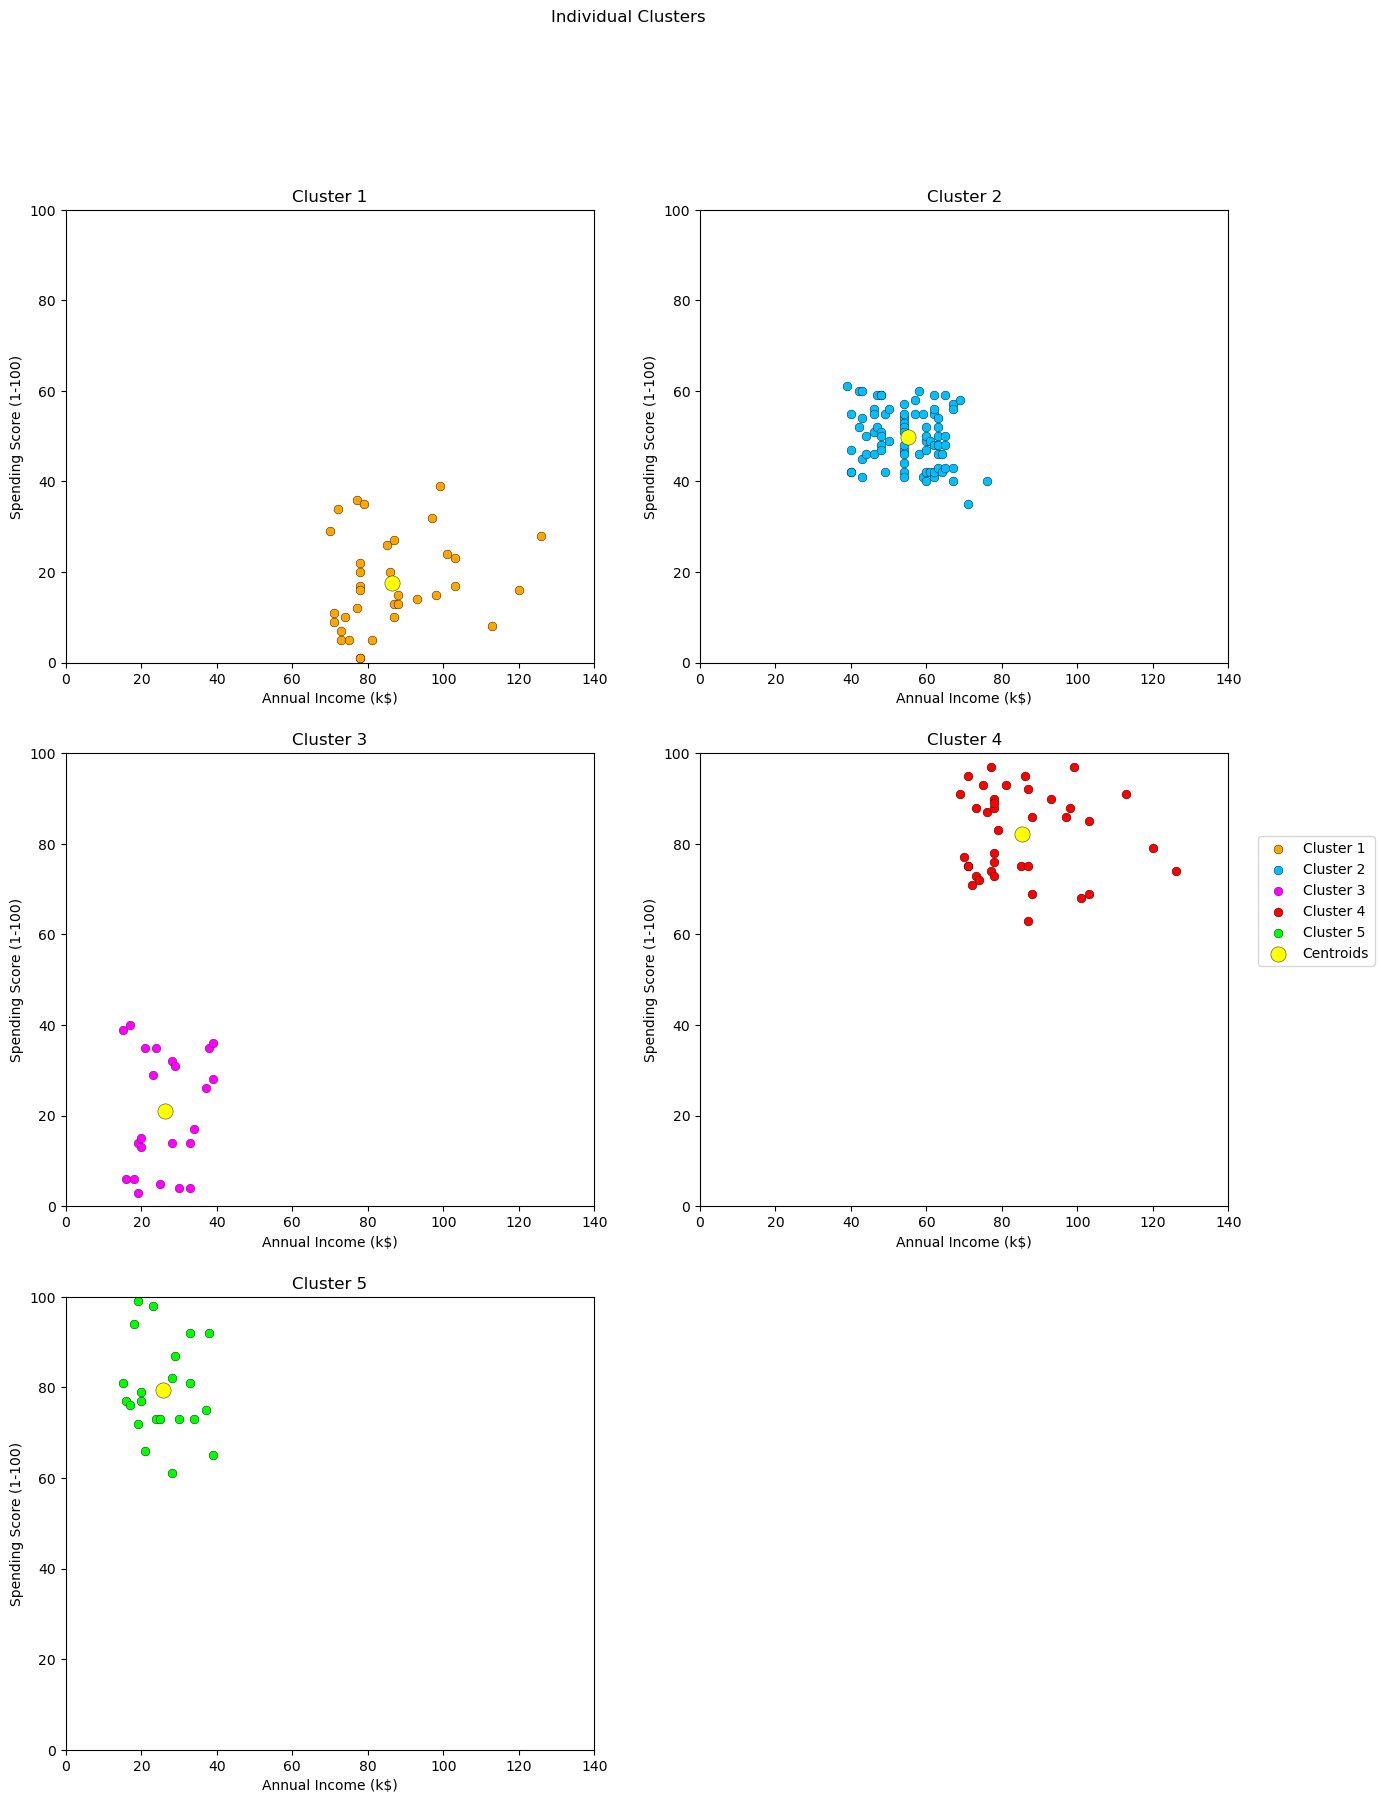

In [41]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=model.cluster_centers_[4,0], y=model.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)', title='Cluster 1')


ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=model.cluster_centers_[0,0], y=model.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)', title='Cluster 2')


ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=model.cluster_centers_[2,0], y=model.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)', title='Cluster 3')


ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=model.cluster_centers_[1,0], y=model.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)', title='Cluster 4')


ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=model.cluster_centers_[3,0], y=model.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

# Analysis

Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers. The following clusters are created by the model,

Cluster Orange : Annual income is high but Spending score is comparatively low. The mall can improvise or can come up with some techniques to attract these people.

Cluster Blue : Annual income and Spending score is comparatively equal and medium these people customers can be the secondary target.

Cluster Purple: Less annual income as well as less spending score. There are logical people who spends as per they earn.

Cluster Red : Annual income and Spending score is comparatively equal and high.These people are mostly the loyal customers of the mall.

Cluster Green : Annual income is low but Spending score is comparatively high and these people are also not the targeted customers for mall as they are already loyal and they shop much.


# DBSCAN

In [42]:
#Initial clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)
dbscan = DBSCAN(eps = 0.2, min_samples = 10)
cluster = dbscan.fit_predict(clustering_data_scaled)

silhouette_score(clustering_data_scaled, cluster)

0.08535818529400196

Optimizing Minimum Sample And Epsilon

In [43]:
for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (5,10):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(clustering_data_scaled)
        score = silhouette_score(clustering_data_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 5
clusters present: [-1  0  1  2  3  4  5]
clusters sizes: [81  6 78 11  9  9  4]
Silhouette Score: 0.1087826967730849

eps 0.2
\min samples 6
clusters present: [-1  0  1  2  3]
clusters sizes: [95 76 10  9  8]
Silhouette Score: 0.09646996412235125

eps 0.2
\min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [107  76   8   7]
Silhouette Score: 0.01961170546672421

eps 0.2
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [115  75   8]
Silhouette Score: 0.040693095966953925

eps 0.2
\min samples 9
clusters present: [-1  0]
clusters sizes: [127  71]
Silhouette Score: 0.09948303906134194

eps 0.3
\min samples 5
clusters present: [-1  0  1  2  3  4  5  6]
clusters sizes: [33 12  5  7 88 30 14  9]
Silhouette Score: 0.32290352151740986

eps 0.3
\min samples 6
clusters present: [-1  0  1  2  3  4]
clusters sizes: [54 10 87 24 14  9]
Silhouette Score: 0.2648388091399833

eps 0.3
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [70 10 

The best hyperparam are eps: 0.4 and min samples: 5, because it has the highest silhouette score

In [44]:
#Final
dbscan = DBSCAN(eps = 0.4, min_samples = 5)
labels = dbscan.fit_predict(clustering_data_scaled)
clustering_data['cluster'] = labels

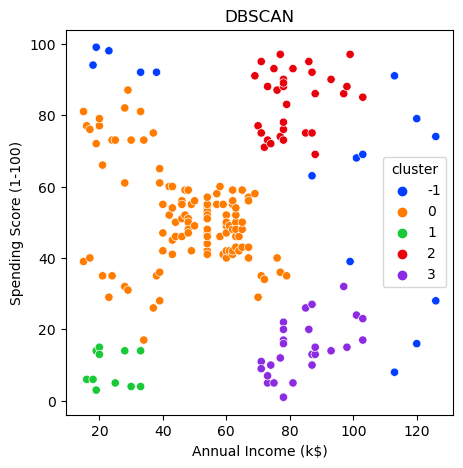

In [45]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = clustering_data, hue = 'cluster', palette = 'bright')
plt.title('DBSCAN')
plt.show()

# Agglomerative Clustering

In [46]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

**WARD Linkage method**

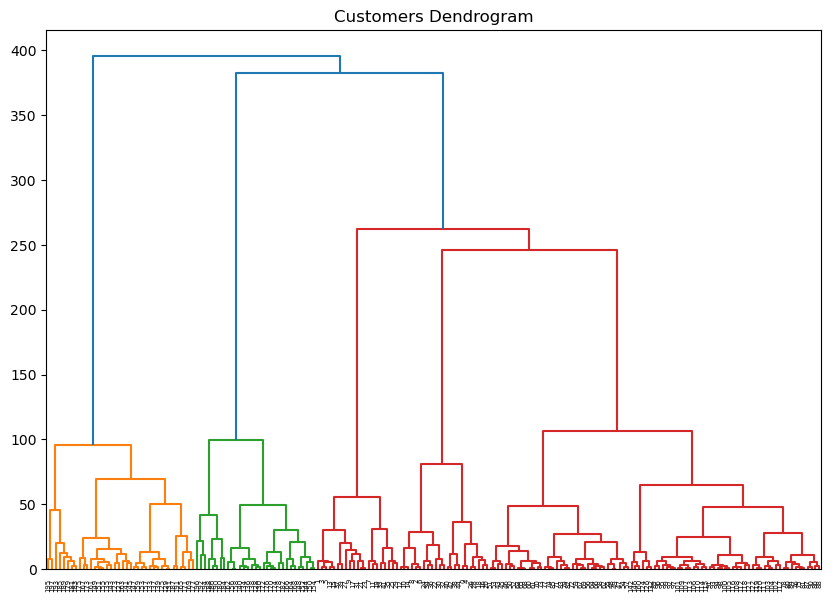

In [47]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = sch.linkage(clustering_data, method='ward', metric="euclidean")
sch.dendrogram(Z=clusters)
plt.show()
     

**AVERAGE Linkage method**

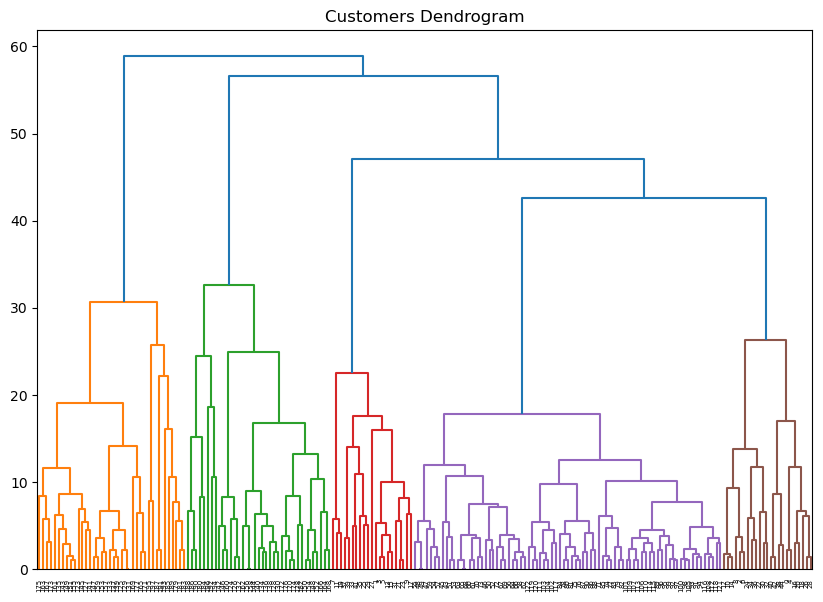

In [48]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = sch.linkage(clustering_data, method='average', metric="euclidean")
sch.dendrogram(Z=clusters)
plt.show()

**COMPLETE Linkage method**

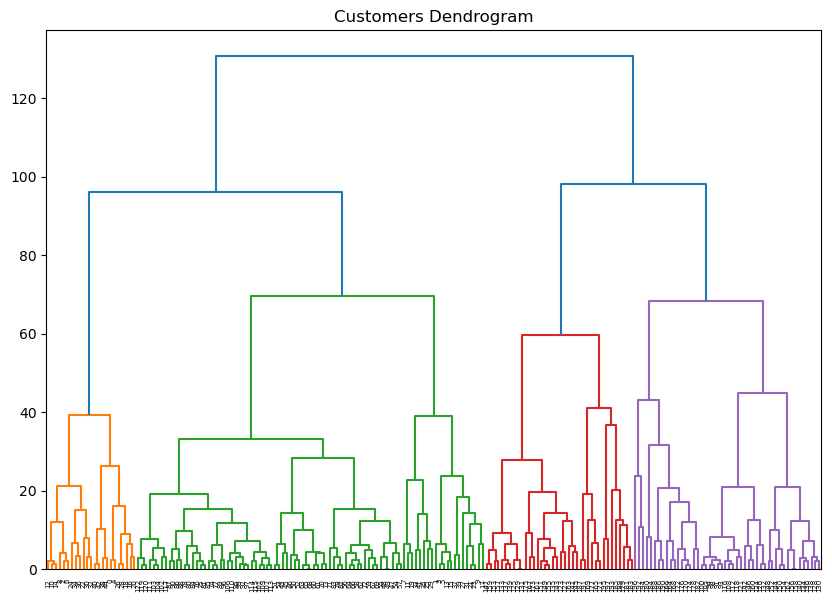

In [49]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = sch.linkage(clustering_data, method='complete', metric="euclidean")
sch.dendrogram(Z=clusters)
plt.show()

In [50]:
#Comparing result
agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
df['ward'] = agg_ward.fit_predict(clustering_data)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
df['average'] = agg_ward.fit_predict(clustering_data)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
df['complete'] = agg_ward.fit_predict(clustering_data)

df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),ward,average,complete
0,0,19,15,39,4,2,1
1,0,21,15,81,3,3,3
2,1,20,16,6,4,2,1


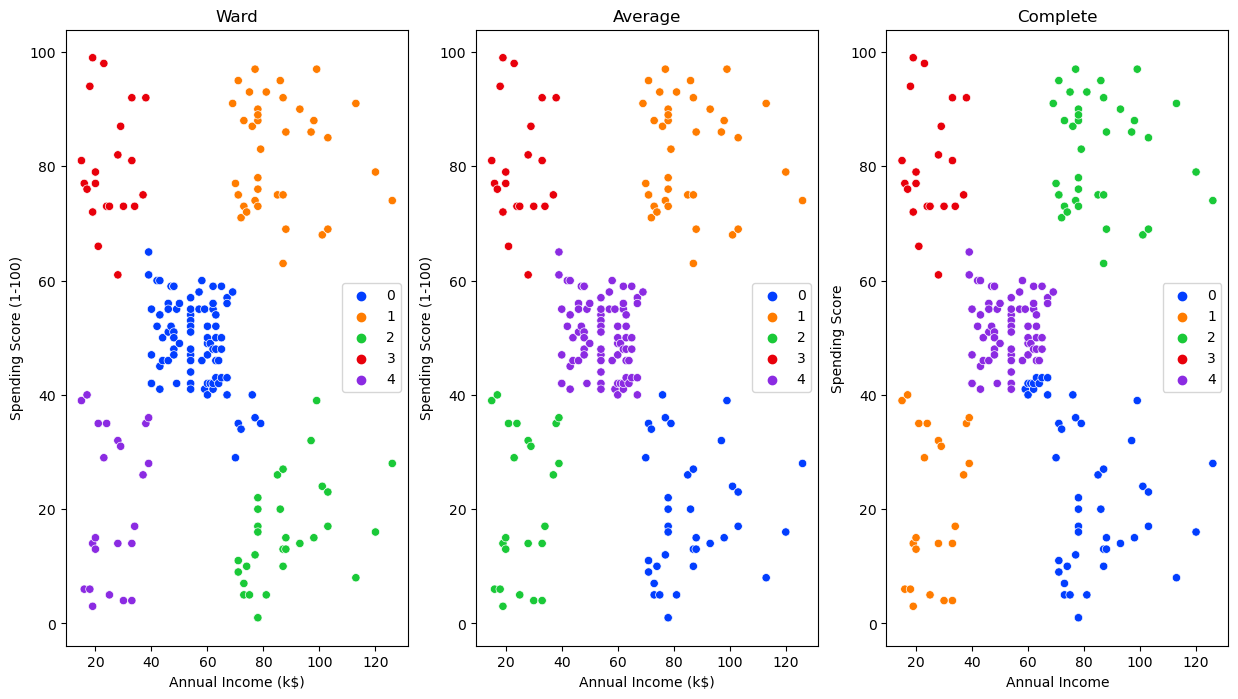

In [51]:
plt.figure(figsize = (15,8))
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'ward', palette = 'bright')
plt.legend(loc = 5)
plt.title('Ward')
plt.subplot(1, 3, 2)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'average', palette = 'bright')
plt.legend(loc = 5)
plt.title('Average')
plt.subplot(1, 3, 3)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'complete', palette = 'bright')
plt.legend(loc = 5)
plt.title('Complete')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
     

In [52]:
cluster_name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple']
ward_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
avg_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
            'Low Income VS High Spending', 'Highest Income VS Highest Spending']
comp_list = ['High Income VS High Spending', 'Medium Income VS Medium Spending', 'High Income  VS Low Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
summary = pd.DataFrame({'Color': color, 'Name': cluster_name, 'Ward': ward_list,
                        'Average': avg_list, 'Complete': comp_list})

In [53]:
summary

,Color,Name,Ward,Average,Complete
0,Blue,Cluster 0,High Income VS Low Spending,High Income VS Low Spending,High Income VS High Spending
1,Orange,Cluster 1,Medium Income VS Medium Spending,Medium Income VS Medium Spending,Medium Income VS Medium Spending
2,Green,Cluster 2,High Income VS High Spending,High Income VS High Spending,High Income VS Low Spending
3,Red,Cluster 3,Low Income VS High Spending,Low Income VS High Spending,Low Income VS High Spending
4,Purple,Cluster 4,Low Income VS Low Spending,Highest Income VS Highest Spending,Low Income VS Low Spending
